## Mercado de Carros Usados: Machine Learning - Arvore de Decisão ( Classificação )

![](img/concessionaria.jpeg)

## Notebook

Este notebook faz parte do conjunto de projetos de data science, machine learning ao qual estarei apresentando meus estudos nesta área.

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação
7. Referências\Fontes

## 1. Definição do Problema

Este projeto foi inspirado no estudo de caso Drivetime Sedans do livro [Marketing Data Science: Modeling Techniques in Predictive Analytics with R and Python](https://www.amazon.com/Marketing-Data-Science-Techniques-Predictive/dp/0133886557), de Thomas Miller. O autor fornece apenas o conjunto de dados e as declarações do problema. Você pode ter acesso ao conjunto de dados e ao meu Código em Python aqui.

O Drivetime é o segundo maior varejista de veículos dos EUA, focado exclusivamente em veículos usados. Fundada em 2002, a empresa tinha 76 revendedores operando em 8 estados. Com a missão “Ser a concessionária de automóveis e a empresa financeira para pessoas com crédito menos do que perfeito”, a Drivetime normalmente vende cerca de 4 mil veículos usados ​​e processa cerca de 10 mil pedidos de crédito por mês.

A Drivetime comprou a maioria de seus veículos nos leilões e atacadistas. Os veículos incluem muitas marcas e modelos de carros e caminhões. Depois de passar por um processo de verificação e reparo, os veículos são enviados para a concessionária para venda. As vendas normais dos revendedores ocorrem dentro de 90 dias após a entrega na concessionária. **Se o veículo não vender dentro dos 90 dias, é chamado de veículo excedente**, o que significa que demorou muito tempo para gerar lucro normal do revendedor.

Cada veículo excedente tem seu preço de venda reduzido, a fim de incentivar as vendas dentro do período de 90 a 119 dias. Além disso, se um veículo excedente não conseguir vender dentro de 120 dias, o veículo será retirado do lote e vendido em leilão. Esses veículos excedentes sofreram uma redução no lucro e até uma perda para o Drivetime. Mais especificamente, enquanto um veículo não excedente é vendido a um preço de marcação de 20%, o preço de um veículo excedente é definido em 10% e um veículo é vendido em leilão a -20%.


### Objetivo

Essa análise é realizada para apoiar os gerentes de compras do Drivetime no processo de seleção. O principal objetivo é aumentar a proporção de veículos vendidos em até 90 dias, reduzir o risco de excesso de veículos e de leilão, além de maximizar o lucro para a empresa.


### Métrica de Classificação

O dataset contempla um atributo **"overage"** (excesso) do tipo categorica ao qual ja fornece informacoes se o veiculo esta acima de 90 dias na concessionaria ou nao, este campo sera utilizado posteriormente para compararmos a **acurácia** do modelo.


## 2. Obtenção dos Dados

O conjunto de dados se encontra disponivel através do arquivo excel [drive_time_sedans.xlsx](data/drive_time_sedans.xlsx)

Este dataset é composto de 17.506 registros e 13 variaveis ( colunas ).O dataset não possui valores ausentes ( NaN ).

A divisao do dataset em Treinamento e Teste sera realizado pelo metodo sklearn.model_selection import train_test_split, tendo o padrao de 75% de dados utilizados para treinamento e 25% de dados utilizados para teste do modelo.

-**`Install e Import - Modulos\Packages `**

In [143]:
# Modulo Pandas é uma biblioteca Python que fornece estruturas e ferramentas de análise de dados.
import pandas as pd
# Estaremos utilizando 2 bibliotecas graficas seaborn e matplotlib.
import seaborn as sns
from matplotlib import pyplot as plt

**Define um estilo para nossos plots**

In [144]:
plt.style.use('ggplot')

**Conexão a fonte de dados**

In [145]:
# criamos um dataframe utilizando o metodo read_excel
df = pd.read_excel('data\drive_time_sedans.xlsx')

-**`Visualizando as dimensoes ( linhas, colunas ) do Dataframe`**

In [146]:
# verificando as dimensões do DataFrame.
# utilizamos o metodo shapeao qual nos fornece o numero de linhas ( shape[0] ) e colunas ( shape[1] ).
print("Variaveis:\t{}\nRegistros:\t{}".format(df.shape[1], df.shape[0]))

Variaveis:	13
Registros:	17506


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável **```overage```** é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

![](img/datatypesvehicles.png)

-**`Visualizando as 5 primeiras linhas do Dataframe`**

In [147]:
# o metodo head() nos fornece as 5 primeiras linhas do nosso dataframe.
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


-**`Visualizando as informações de colunas do Dataframe`**

In [148]:
# o metodo info() nos fornece os atributos ( variaveis ) , numero de registros , tipo do objeto que estao contidos no dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17506 entries, 0 to 17505
Data columns (total 13 columns):
data.set             17506 non-null object
total.cost           17506 non-null int64
lot.sale.days        17506 non-null int64
overage              17506 non-null object
mileage              17506 non-null int64
vehicle.type         17506 non-null object
domestic.import      17506 non-null object
vehicle.age          17506 non-null int64
vehicle.age.group    17506 non-null object
color.set            17506 non-null object
makex                17506 non-null object
state                17506 non-null object
make.model           17506 non-null object
dtypes: int64(4), object(9)
memory usage: 1.7+ MB


**- `Informações estatísticas das colunas Dataframe`**

In [149]:
# identificar o tipo de cada variável
display(df.dtypes)

data.set             object
total.cost            int64
lot.sale.days         int64
overage              object
mileage               int64
vehicle.type         object
domestic.import      object
vehicle.age           int64
vehicle.age.group    object
color.set            object
makex                object
state                object
make.model           object
dtype: object

In [150]:
# Este metodo apresenta as medidas centrais de variaveis numericas.
# sem o uso de parametros retorna metricas somente para campos do tipo numerico.
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,17506.000000,17506.000000,17506.000000,17506.000000
mean,4894.974009,46.819148,76950.447161,5.441049
std,934.798660,52.750454,16978.582173,1.751119
min,1375.000000,0.000000,82.000000,1.000000
25%,4300.000000,7.000000,67242.250000,4.000000
50%,4852.000000,24.000000,77961.000000,5.000000
75%,5444.000000,74.000000,89089.750000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [151]:
df["lot.sale.days"].median()

24.0

Pouca gente sabe que o método ```df.describe()``` pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento ```include=['O']```. 

**ATENÇÃO, é a letra 'O', e não o número 0!**

In [152]:
# Este metodo apresenta as medidas de contagem, valores unicos e frequencia do maximo valor de variaveis categoricas.
# com o uso de parametros retorna metricas somente para campos do tipo object.
df.describe(include=['O'])

,data.set,overage,vehicle.type,domestic.import,vehicle.age.group,color.set,makex,state,make.model
count,17506,17506,17506,17506,17506,17506,17506,17506,17506
unique,3,2,5,2,5,8,20,8,110
top,TRAIN,NO,FAMILY.MEDIUM,Domestic,SEVEN+,WHITE,FORD,TX,CHEVROLET.LUMINA
freq,8753,14011,6897,12035,4537,3603,2287,4348,997


**Consultando dados nulos ou Missing Values no Dataframe**

In [153]:
# O uso desse conjunto de metodos permite identificar qua(l)(is) campo(s) possuem valor null (NaN ) e qtos registros
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

### Qual a distribuição de custo dos carros ?

<IPython.core.display.Javascript object>


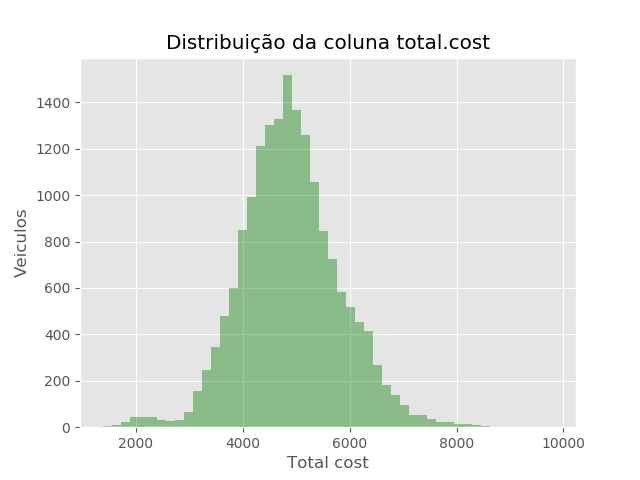

Text(0, 0.5, 'Veiculos')

In [154]:
# o recurso de %matplotlib faz com que o grafico seja apresentado nesse proprio notebook.
%matplotlib notebook
# grafico de distribuição da variavel total.cost no meu dataset.
sns.distplot(df['total.cost'], hist=True, color='green', kde=False)
plt.title('Distribuição da coluna total.cost')
plt.xlabel('Total cost')
plt.ylabel('Veiculos')

#### `Conclusões`:

- *Podemos observar que a maioria dos carros custam em torno de 4k e 6k.*

### Qual a distribuição de dias que os carros ficam na concessionária?

<IPython.core.display.Javascript object>


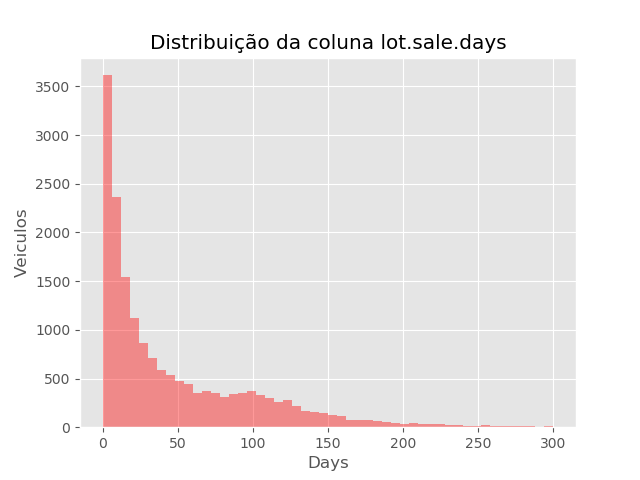

Text(0, 0.5, 'Veiculos')

In [155]:
# o recurso de %matplotlib faz com que o grafico seja apresentado nesse proprio notebook
%matplotlib notebook
sns.distplot(df['lot.sale.days'],  hist=True, color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.days')
plt.xlabel('Days')
plt.ylabel('Veiculos')

#### `Conclusões`:

- *Podemos observar que os dias de vendas são inclinados para o lado esquerdo
 isso nos mostra que a maioria dos veiculos são vendidos nos primeiros 25 dias.*

### Qual a distribuição da Milhagem dos veículos na concessionária?

<IPython.core.display.Javascript object>


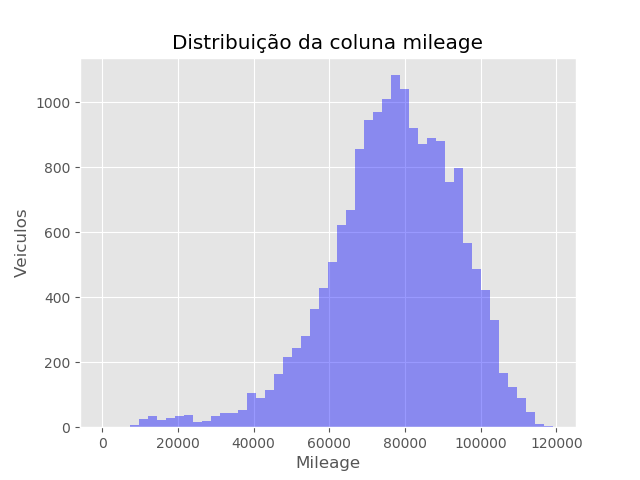

Text(0, 0.5, 'Veiculos')

In [156]:
# o recurso de %matplotlib faz com que o grafico seja apresentado nesse proprio notebook
%matplotlib notebook
sns.distplot(df['mileage'], hist=True, color='blue', kde=False)
plt.title('Distribuição da coluna mileage')
plt.xlabel('Mileage')
plt.ylabel('Veiculos')

#### `Conclusões`:

- *Podemos observar que a grande maioria dos veículos estão na faixa de 60.000 a 90.000 de milhagem*

### Qual a distribuição da idade dos veículos da concessionária?

<IPython.core.display.Javascript object>


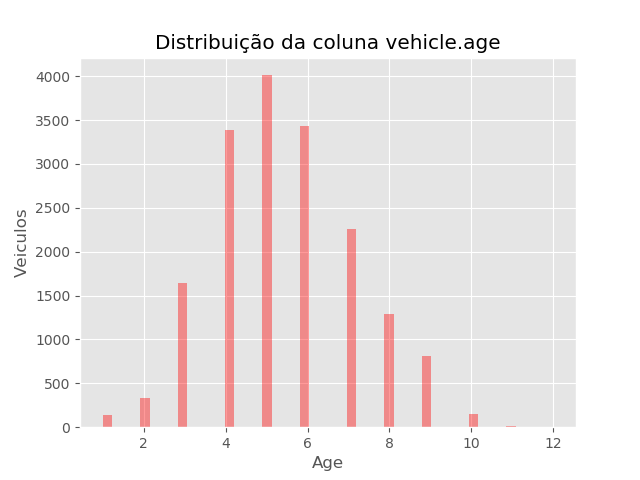

Text(0, 0.5, 'Veiculos')

In [157]:
%matplotlib notebook
sns.distplot(df['vehicle.age'], hist=True, color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')
plt.xlabel('Age')
plt.ylabel('Veiculos')

#### `Conclusões`:

- *Podemos observar que a grande maioria dos veiculos possui uma idade na faixa entre 4 a 6 anos.*

### Visualizando a Correlação entre algumas variáveis

- O quanto alguma variável numérica tem correlação com outra variável ?
- Correlação pode ser positiva ou negativa

In [158]:
# visualizando as variaveis numericas , as 5 primeiras linhas
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,69384,4,18,4662
2,58239,4,65,4459
3,58999,3,1,4279
4,47234,6,37,4472


- Calcula a correlação com método corr()

In [159]:
## Correlacao entre variaveis numericas ( por padrao a função utliza metodo = Pearson, sendo possivel alterar este parametro)
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.455129,0.041818,-0.123133
vehicle.age,0.455129,1.000000,0.146083,-0.312491
lot.sale.days,0.041818,0.146083,1.000000,0.152993
total.cost,-0.123133,-0.312491,0.152993,1.000000


In [160]:
# criar um dataframe para armazenar os valores de correlacao
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

In [161]:
type(correlacoes)

pandas.core.frame.DataFrame

### Plot o mapa de calor para visualizar as correlações

<IPython.core.display.Javascript object>


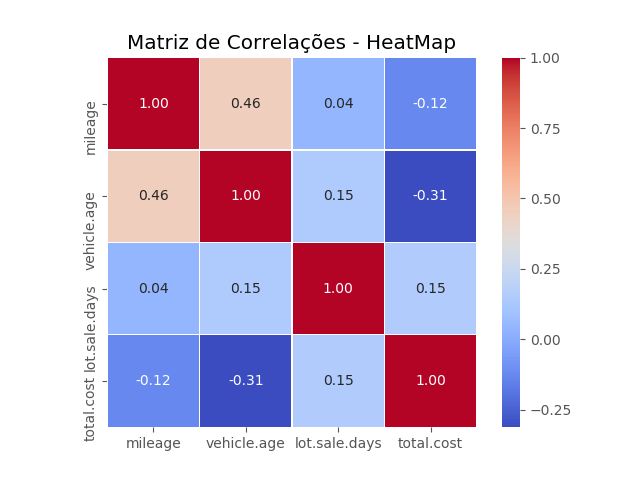

Text(0.5, 1.0, 'Matriz de Correlações - HeatMap')

In [162]:
# plotar um grafico de correlacoes, utilizando o metodo heatmap da library seaborn
%matplotlib notebook
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white')
plt.title('Matriz de Correlações - HeatMap')

#### `Conclusões`:

- *O gráfico de calor acima nos mostra que não existe uma correlação forte das variáveis com a quantidade de dias de permanencia (lot.sale.days).*
- *Podemos ver que a Milhagem tem uma correlação positiva com a idade do veículo (0.46).*
- *Podemos ver também que os dias de permanencia na concessionaria (lot.sale.days) tem uma correlação positiva com o custo total do veículo (total.cost) e com a idade do veículo (vehicle.age).*

### Visualizando a dispersão entre os dias de permanencia e algumas variáveis

<IPython.core.display.Javascript object>


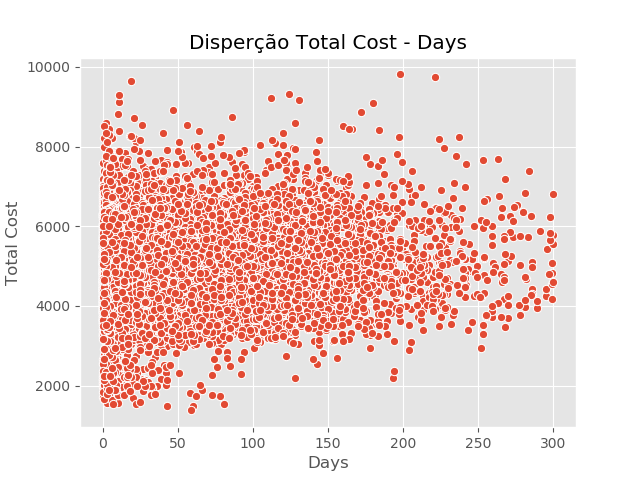

Text(0, 0.5, 'Total Cost')

In [163]:
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y="total.cost", data=df)
plt.title('Disperção Total Cost - Days')
plt.xlabel('Days')
plt.ylabel('Total Cost')

#### `Conclusões`:

- *Podemos notar que não existe um padrao definido na dispersao dos valores de custo em relação a permanencia dos veiculos na concessionaria.*

<IPython.core.display.Javascript object>


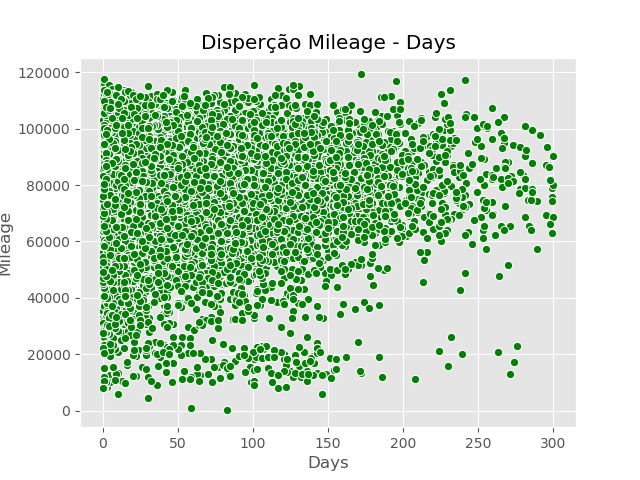

Text(0, 0.5, 'Mileage')

In [164]:
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y="mileage", color='green', data=df)
plt.title('Disperção Mileage - Days')
plt.xlabel('Days')
plt.ylabel('Mileage')

#### `Conclusões`:

- *Podemos notar que não existe um padrao definido na dispersao dos valores de milhagem em relação a permanencia dos veiculos na concessionaria, ha uma leve tendencia a veiculos com maior valor de milhagem apresentarem maior quantidade de dias porem não é via de regra pois temos veiculos com alto valor de milhagem que permanecem apenas no intervalo entre [0,100]*

### Tempo médio de Dias de permanencia na Concessionaria por Tipos de Veiculos

<IPython.core.display.Javascript object>


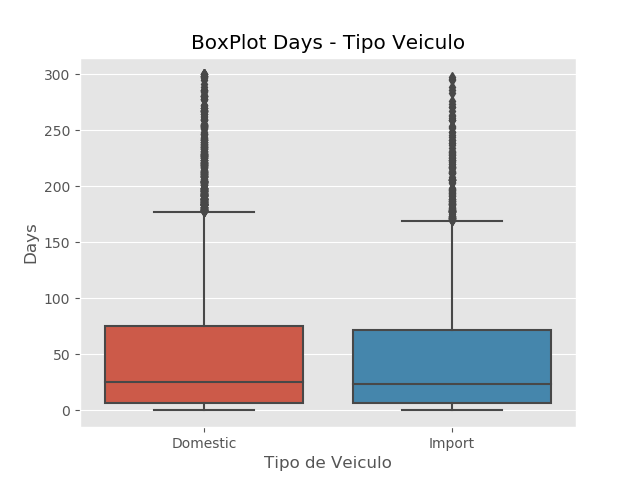

Text(0, 0.5, 'Days')

In [165]:
%matplotlib notebook
sns.boxplot(x="domestic.import", y="lot.sale.days", data=df)
plt.title('BoxPlot Days - Tipo Veiculo')
plt.xlabel('Tipo de Veiculo')
plt.ylabel('Days')

**`Conclusões`**:

- *Não existem diferenças significativas entre veículos domesticos ( nacionais ) e veículos importados em termos dos dias de permanencia, isto é visivel através da mediana ( 2º quartil ) apresentado de cada boxplot.*

### Tempo médio de Dias de permanencia na Concessionaria por Categoria de Veiculos ###

<IPython.core.display.Javascript object>


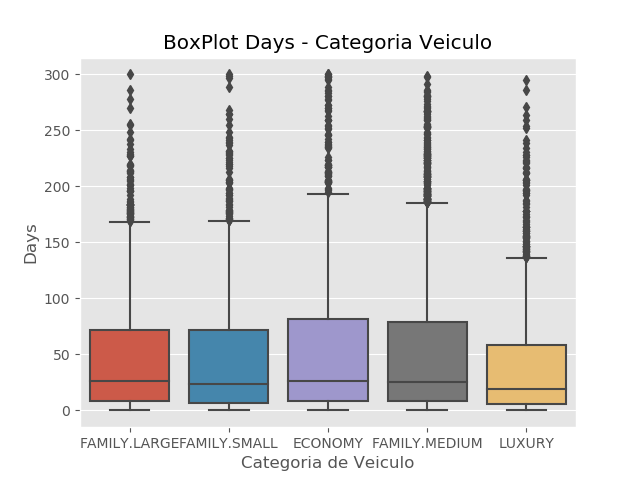

Text(0, 0.5, 'Days')

In [166]:
%matplotlib notebook
sns.boxplot(x="vehicle.type", y="lot.sale.days", data=df)
plt.title('BoxPlot Days - Categoria Veiculo')
plt.xlabel('Categoria de Veiculo')
plt.ylabel('Days')

**`Conclusões`**:

- *Veiculos Econômicos demoram um pouco mais para serem vendidos se comparados as categorias Família e Luxo.*
- *Em média, levam 26 dias para vender veículos Econômicos,  23 dias para vender veículos de Família e 17 dias para vender veículos de Luxo.*

### Tempo médio de Dias de permanencia na Concessionaria por Cor de Veiculos

<IPython.core.display.Javascript object>


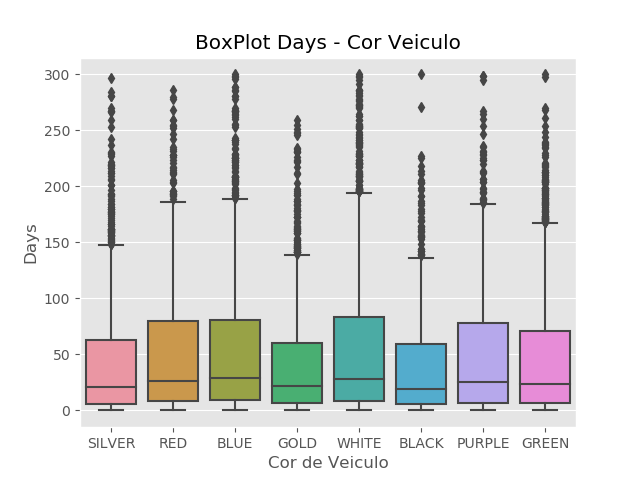

Text(0, 0.5, 'Days')

In [167]:
%matplotlib notebook
sns.boxplot(x="color.set", y="lot.sale.days", data=df)
plt.title('BoxPlot Days - Cor Veiculo')
plt.xlabel('Cor de Veiculo')
plt.ylabel('Days')

**`Conclusões`**

- *Podemos observar que nesse gráfico que em média os carros que saem mais rápido são carros pretos com 17 dias.*
- *Em segundo lugar são carros prata com 18 dias. Por fim os carros que demoram mais para serem vendidos são carros brancos com 27 dias.*

### Tempo médio de Dias de permanencia na Concessionaria por Marca dos Veiculos

<IPython.core.display.Javascript object>


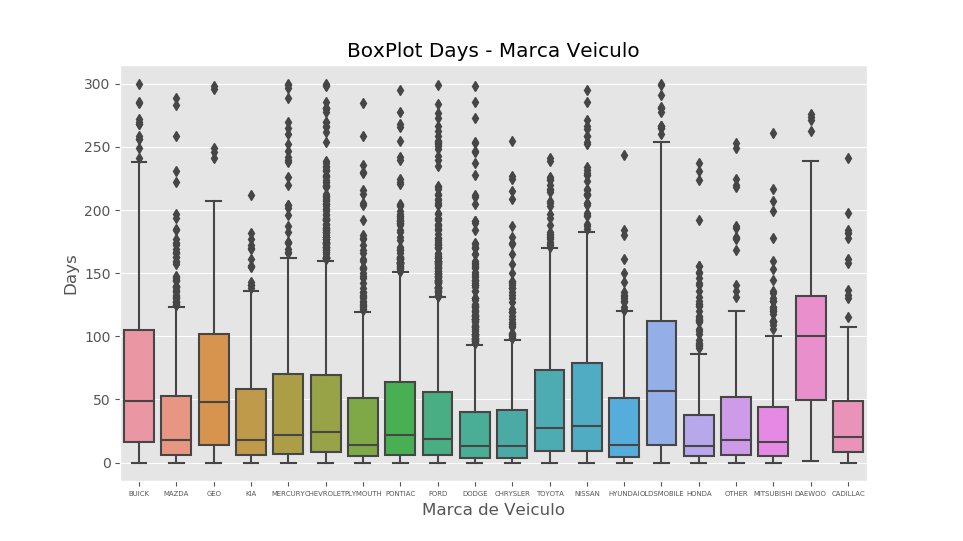

Text(0, 0.5, 'Days')

In [169]:
%matplotlib notebook
sns.boxplot(x="makex", y="lot.sale.days", data=df)
plt.xticks(size=5)
plt.title('BoxPlot Days - Marca Veiculo')
plt.xlabel('Marca de Veiculo')
plt.ylabel('Days')

**`Conclusões:`**

- *Marcas tem uma grande diferença no tempo de dias de permanencia dos veículos nas concessionarias.*
- *Algumas marcas de veículos que vendem rápido tendem a ser Honda, Chrysler, Dodge, Hyundai, Plymouth.*
- *As marcas Daewoo, Oldsmobile, Buick e GEO permanecem por mais tempo antes de serem vendidos.*

### Tempo médio de Dias de permanencia na Concessionaria por Estado

<IPython.core.display.Javascript object>


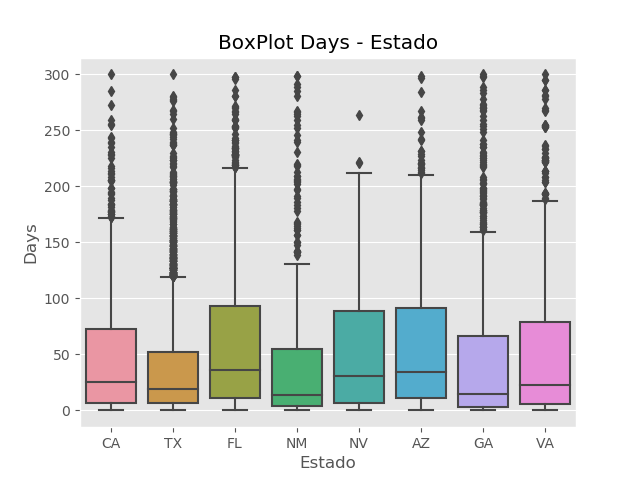

Text(0, 0.5, 'Days')

In [170]:
%matplotlib notebook
sns.boxplot(x="state", y="lot.sale.days", data=df)
plt.title('BoxPlot Days - Estado')
plt.xlabel('Estado')
plt.ylabel('Days')

#### `Conclusões`:

- *Alguns estados como Texas, Novo Mexico e Georgia tem diferença significante de dias de permanencia na concessionaria se comparados com Florida, Nevada e Arizona.*

## 4 Preparação dos Dados

Até esta etapa, importarmos os dados, formulamos hipóteses, iniciamos uma análise exploratória dos dados ( EDA ) e visualizamos graficos e correlações entre variáveis que julgamos pertinentes na preparação do nosso modelo.

Neste momento iremos selecionar quais variaveis possuem relevancia para a construção do modelo, verificar ausencia de valores ( NaN ) e proceder com o preenchimento adequado, tratar variaveis categoricas.

### Construindo um Modelo de Machine Learning

In [171]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


**Pre-processando os dados**

- Precisamos pré-processar algumas colunas, pois, são colunas categóricas.
- Nesta etapa também removemos colunas não importantes para o modelo.

**Removendo a coluna vehicle.age.group**

In [172]:
# Retiramos a coluna 'vehicle.age.group' pois ela é um atributo categorico e que ja faz referencia 
# a um atributo numerico ( vehicle.age ), 
# este atributo não agrega valor a analise 
# o parametro axis=1 informa que a função drop é executada no contexto de coluna
# o parametro inplace informa se a ação tem resultado nos dados em memoria ou nao
df.drop('vehicle.age.group', axis=1, inplace=True)

In [173]:
# Retiramos a coluna 'data.set' pois ela é um atributo categorico que classifica os registros de treino, teste e validação
# esta classificacao sera realizada pela função train_test_split do pacote sklearn.model_selection
df.drop('data.set', axis=1, inplace=True)

**Aplicando o LabelEncoder para codificação de variáveis categóricas**

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

**Aplica o Labelencoder nos dados categóricos**

In [176]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

**Dados transformados**

In [177]:
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,2
1,4662,18,NO,69384,3,1,4,6,11,6,67
2,4459,65,NO,58239,0,1,4,5,7,2,49
3,4279,1,NO,58999,0,1,3,5,10,6,61
4,4472,37,NO,47234,2,0,6,1,12,4,69


**Separa a classe dos dados**

In [178]:
# esta é nossa variavel "target" , apresentando valores YES ( Carros que permanecem acima de 90 dias ) 
# e NO ( Carros que permanecem abaixo de 90 dias ).
y = df['overage']

In [179]:
y.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: overage, dtype: object

**Apaga a coluna overage e a coluna lot.days.sales**

In [180]:
X = df.drop(['lot.sale.days','overage'], axis=1)

In [181]:
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,2
1,4662,69384,3,1,4,6,11,6,67
2,4459,58239,0,1,4,5,7,2,49
3,4279,58999,0,1,3,5,10,6,61
4,4472,47234,2,0,6,1,12,4,69


## 5 Construção do Modelo e Avaliação

**Separando os dados de treino e teste**

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [184]:
X_treino.count()

total.cost         13129
mileage            13129
vehicle.type       13129
domestic.import    13129
vehicle.age        13129
color.set          13129
makex              13129
state              13129
make.model         13129
dtype: int64

In [185]:
y_treino.count()

13129

In [186]:
X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
9352,4133,88635,0,0,7,6,2,4,19
14695,4844,67102,1,0,6,2,0,1,4
1383,4614,88502,1,0,7,3,15,7,81
13676,5777,58856,3,0,4,7,0,6,8
16711,5335,78450,3,1,3,6,14,0,79


In [187]:
y_treino.head()

9352     YES
14695     NO
1383      NO
13676    YES
16711     NO
Name: overage, dtype: object

In [188]:
X_teste.count()

total.cost         4377
mileage            4377
vehicle.type       4377
domestic.import    4377
vehicle.age        4377
color.set          4377
makex              4377
state              4377
make.model         4377
dtype: int64

In [189]:
y_teste.count()

4377

In [190]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
16947,2234,90337,2,0,9,7,2,1,19
8965,4551,61798,2,0,7,7,0,1,6
13007,4211,90047,2,0,9,7,15,3,89
4495,5149,74764,3,0,3,1,0,6,8
5824,6418,76334,4,1,6,6,19,2,107


**Aplicando Machine Learning com Arvore de Decisão**

In [191]:
from sklearn import tree

In [192]:
arvore = tree.DecisionTreeClassifier()

In [193]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Validação do Modelo**

In [194]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
16947,2234,90337,2,0,9,7,2,1,19
8965,4551,61798,2,0,7,7,0,1,6
13007,4211,90047,2,0,9,7,15,3,89
4495,5149,74764,3,0,3,1,0,6,8
5824,6418,76334,4,1,6,6,19,2,107


In [195]:
arvore.predict(X_teste)

array(['NO', 'NO', 'NO', ..., 'YES', 'NO', 'NO'], dtype=object)

In [196]:
resultado = arvore.predict(X_teste)

In [197]:
resultado

array(['NO', 'NO', 'NO', ..., 'YES', 'NO', 'NO'], dtype=object)

In [198]:
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

          NO       0.84      0.83      0.83      3483
         YES       0.36      0.37      0.37       894

   micro avg       0.73      0.73      0.73      4377
   macro avg       0.60      0.60      0.60      4377
weighted avg       0.74      0.73      0.74      4377



In [199]:
# Model Accuracy, how often is the classifier correct?
print("Acuracia:",metrics.accuracy_score(y_teste, resultado))

Acuracia: 0.7349782956362806


**`Conclusões`:**

- Tivemos uma **precisão de 73,49%** para classificar carros que superam os 90 dias.
- O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features.

**Features mais importantes para o modelo**

In [200]:
arvore.feature_importances_

array([0.27425179, 0.25811321, 0.05289919, 0.01141569, 0.07440861,
       0.08129152, 0.03455568, 0.07903314, 0.13403117])

In [201]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [202]:
feature_imp

total.cost         0.274252
mileage            0.258113
vehicle.type       0.052899
domestic.import    0.011416
vehicle.age        0.074409
color.set          0.081292
makex              0.034556
state              0.079033
make.model         0.134031
dtype: float64

**Visualizando as Features mais importantes do Modelo**

<IPython.core.display.Javascript object>


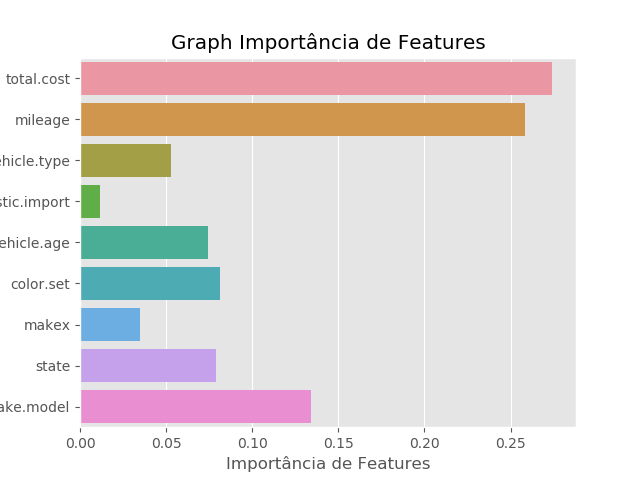

In [203]:
%matplotlib notebook
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title("Graph Importância de Features")
plt.show()

## Visualizando a árvore de Decisão

- Instala as bibliotecas para visualização no jupyter notebook

In [204]:
#!pip install pydot
#!pip install graphviz
#!pip install pydotplus

In [205]:
import pydot
import pydotplus
import graphviz 
from ipywidgets import interactive

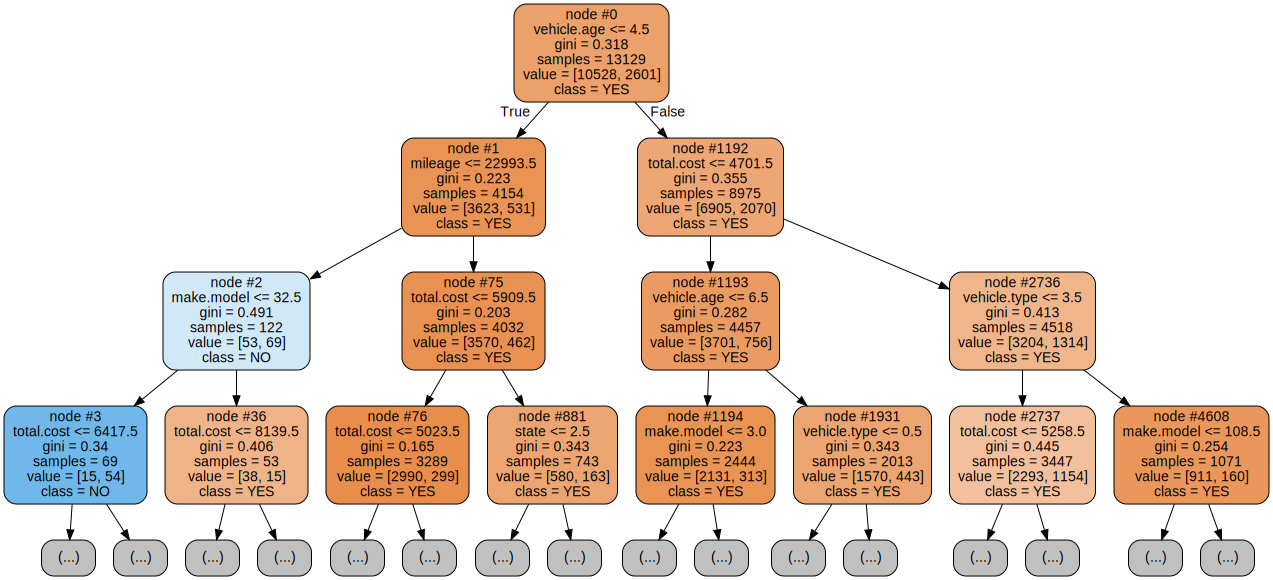

In [206]:
# exporta resultado para dot source
dot_data = tree.export_graphviz(
         arvore,
         feature_names=X.columns,
         class_names=y,
         max_depth=3, 
         filled=True, 
         rounded=True,
         node_ids=True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph


In [207]:

# exporta para pdf
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_pdf('reports\DecisionTree_UsedVehicleMarket.pdf')

True

**`Conclusões`**

- *Os nós que melhor separam os dados são:* ***o nó vehicle.age, em seguida o nó total.cost e mileage***.

## 6 Avaliação

Nessa analise do mercado de carros usados tivemos a chance de aplicar um modelo supervisionado de Arvore de Decisão envolvendo algumas caracteristicas ( **features** ) que podem vir a afetar o tempo de permanencia de veiculos nas concessionarias aguardando para serem vendidos.
Podemos notar que dentre as caracteristicas mais seletivas temos a idade do veiculo, o total de custo e a milhagem, aproveitando a analise exploratoria dos dados utlizando BoxPlot podemos destacar alguns diferenciais:

- Marcas como Honda, Chrysler, Dodge, Hyundai, Plymouth devem ter prioridade de compra pelas concessionarias em comparação com Daewoo, Oldsmobile, Buick e GEO.
- Veiculos de Categorias Luxo e Familia devem ser mais priorizados em relação a categoria Economica.
- Veiculos nas Cores Preto e Prata devem ser priorizados em relação a veiculos de cores Branco e Azul sendo estas cores de pouca procura.

## 7 Referências\Fontes

[Machine Learning Basics: Decision Tree From Scratch](https://towardsdatascience.com/machine-learning-basics-descision-tree-from-scratch-part-i-4251bfa1b45c), Conceitos e explicações de medidas de seleção de atributos para Arvore de Decisao, Entropia, Ganho de Informação, etc.

[Arvore de Decisão](https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/), Tutorial Completo Arvore de Decisão.

[Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python), Conceitos, explicações de medidas de seleção, Pros e Cons.  

**Cursos:** - Abaixo uma relação de Profissionais aos quais ja tive o prazer de conhecer, realizar cursos e afirmo com total segurança a qualidade do ensino prestado.

[Minerando Dados](https://minerandodados.com.br/), Excelente Curso de Data Science , responsaveis **Felipe e Rodrigo**.

[EstatiDados](https://comunidadeestatistica.landen.co/), Excelente Curso de Estatistica aplicada a Data Science, Linguagem R, responsavel **Thiago Marques**.

[Statistical Learning](https://asn.rocks/), Excelente Profissional na Area de Estatistica, responsavel **Adriana Silva**.

[Aprenda Virtual](http://bicomvatapa.blogspot.com/p/sobre.html), Excelente Portal para aprendizado de BI e Data Science, responsavel **Grimaldo Lopes**.

[Sigmoidal](https://sigmoidal.ai/), Excelente Curso de Data Science, responsavel **Carlos Melo**.

[LabData - FIA](http://labdata.fia.com.br/), Excelente curso de Pós Graduação, MBA nas areas de Data Science, Datamining, responsavel **Alessandra Montini**.